<a href="https://colab.research.google.com/github/pavlosero/SentimentBTCPricePrediction/blob/main/final_reddit_btc_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data extraction

In [ ]:
# imports
import os
import zipfile
import urllib.request
import pandas as pd
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display

In [ ]:
tb_path = os.path.join(os.getcwd(),"Dataset")
if not os.path.exists(tb_path):
    os.makedirs(tb_path)

In [ ]:
# if not yet downloaded
!wget "https://www.dropbox.com/s/1q4l02692irq3pb/reddit_btc_dataset.zip" -P Dataset/

In [ ]:
tb_zip = os.path.join(os.getcwd(), "Dataset/reddit_btc_dataset.zip")
with zipfile.ZipFile(tb_zip, 'r') as zip_ref:
    zip_ref.extractall(path=tb_path)
    print("Successful extraction")

Successful extraction


# Reddit posts processing

In [ ]:
# reddit data
path = "/content/Dataset/"
filename_reddit_posts = "crypto-aug-2021-posts.csv"
filename_reddit_comments = "crypto-aug-2021-comments.csv"
pd_posts = pd.read_csv(path+filename_reddit_posts)
pd_comments = pd.read_csv(path+filename_reddit_comments)
pd_posts

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,pfi1nw,9e4pv,cryptomoonshots,False,1630454394,https://old.reddit.com/r/CryptoMoonShots/comme...,self.cryptomoonshots,NaN,⚜️ 𝓟𝓻𝓸𝓶𝓮𝓽𝓱𝓮𝓾𝓼 ⚜️\n\n&amp;#x200B;\n\n&amp;#x200...,🌍Next Generation Safe Token with $Cake Rewards...,3
1,post,pfi0ci,9e4pv,cryptomoonshots,False,1630454262,https://old.reddit.com/r/CryptoMoonShots/comme...,self.cryptomoonshots,NaN,[removed],CryptoBlast | Just stealth launched! 🚀| Insane...,1
2,post,pfhztt,9e4pv,cryptomoonshots,False,1630454211,https://old.reddit.com/r/CryptoMoonShots/comme...,self.cryptomoonshots,NaN,1️. WHAT IS GETADAHERE?\n\nWe are a meme token...,🔹 getADAhere | 8% ADA Rewards | 900IQ Name | F...,3
3,post,pfhztr,9e4pv,cryptomoonshots,False,1630454211,https://old.reddit.com/r/CryptoMoonShots/comme...,self.cryptomoonshots,NaN,Privacy is at odds and world governments are t...,💴 DEEZcash 💴 | $DZC | Fair Launched | Powerful...,11
4,post,pfhz1z,9e4pv,cryptomoonshots,False,1630454139,https://old.reddit.com/r/CryptoMoonShots/comme...,self.cryptomoonshots,NaN,[removed],🔹 getADAhere 🔹 | 😱 8% ADA Rewards 😱 | 🔥 900IQ ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
250564,post,ovi1xx,3nwemq,cryptomoon,False,1627776713,https://old.reddit.com/r/CryptoMoon/comments/o...,self.cryptomoon,NaN,🍕HOTCAKE🍕 ⏰ 1 SECOND OLD ON BSC 🍕 Listed ...,🍕HOTCAKE🍕 ⏰ 1 SECOND OLD ON BSC 🍕 Listed On Pa...,1
250565,post,ovi1aq,3nwemq,cryptomoon,False,1627776648,https://old.reddit.com/r/CryptoMoon/comments/o...,self.cryptomoon,NaN,[removed],🪀 TOKEMON NFT is the Next Binamon / Axie Infin...,1
250566,post,ovhzzt,3nwemq,cryptomoon,False,1627776513,https://old.reddit.com/r/CryptoMoon/comments/o...,self.cryptomoon,NaN,[removed],⭐️Fair Launch Token⭐️|| 🔥Ecosystem🔥||⚡️Auto LP...,8
250567,post,ovhx98,3nwemq,cryptomoon,False,1627776226,https://old.reddit.com/r/CryptoMoon/comments/o...,self.cryptomoon,NaN,🍕HOTCAKE🍕 ⏰ 1 SECOND OLD ON BSC 🍕 Listed ...,🍕HOTCAKE🍕 ⏰ 1 SECOND OLD ON BSC 🍕 Listed On Pa...,1


In [ ]:
pd_comments

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,hb4hdni,9e4pv,cryptomoonshots,False,1630454394,https://old.reddit.com/r/CryptoMoonShots/comme...,Be sure to do your own diligence. Assume that ...,0.8885,1
1,comment,hb4hd3u,9e4pv,cryptomoonshots,False,1630454387,https://old.reddit.com/r/CryptoMoonShots/comme...,[removed],NaN,1
2,comment,hb4hbyc,9e4pv,cryptomoonshots,False,1630454372,https://old.reddit.com/r/CryptoMoonShots/comme...,[removed],NaN,1
3,comment,hb4hbge,9e4pv,cryptomoonshots,False,1630454366,https://old.reddit.com/r/CryptoMoonShots/comme...,[removed],NaN,1
4,comment,hb4hb1u,9e4pv,cryptomoonshots,False,1630454360,https://old.reddit.com/r/CryptoMoonShots/comme...,[removed],NaN,1
...,...,...,...,...,...,...,...,...,...,...
3756092,comment,h79bjku,3nwemq,cryptomoon,False,1627776211,https://old.reddit.com/r/CryptoMoon/comments/o...,Great project,0.6249,1
3756093,comment,h79bhmb,3nwemq,cryptomoon,False,1627776181,https://old.reddit.com/r/CryptoMoon/comments/o...,[removed],NaN,1
3756094,comment,h79bftq,3nwemq,cryptomoon,False,1627776154,https://old.reddit.com/r/CryptoMoon/comments/o...,[removed],NaN,1
3756095,comment,h79beot,3nwemq,cryptomoon,False,1627776136,https://old.reddit.com/r/CryptoMoon/comments/o...,[removed],NaN,1


## Preprocessing

In [ ]:
from nltk.probability import FreqDist
import re
import nltk
from functools import reduce
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#keywords
cryptos = ["bitcoin", "btc"]
# undesired
undesired_phrases = ["[removed]", "[deleted]", "i am a bot", "i am bot", "contact the moderators", "give away", "giving away", "pump register", "pump join"]


def to_lower(data):
  return data.lower()

def cleaning_newlines(data):
    return re.sub(r'\n','',data)

def cleaning_URLs(data):
    return re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',data)

def cleaning_sqbracket(data):
    return re.sub('\[[^)]*\]','',data)

def cleaning_parenthesis(data):
    return re.sub('\([^)]*\)','',data)

#stp word removal is very imp in sentiment analysis
STOPWORDS=stopwords.words('english')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def strip_text(text):
    return re.sub('  +',' ',text)

def strip_t(text):
    return text.strip()

def is_desired_phrase(text):
    for phrase in undesired_phrases:
      if all([a in text.split() for a in phrase.split()]):
        return False
    return True

preprocessing_pipeline = [to_lower, cleaning_newlines, cleaning_URLs, cleaning_sqbracket, cleaning_parenthesis, cleaning_stopwords, strip_text, strip_t]

#### Posts preprocessing

In [ ]:
#posts preprocessing

# select only body and timestamp and permalink for comments
posts = pd_posts[["created_utc", "title", "selftext", "permalink"]].copy() 

# merge title and selftex
posts["body"] = posts["title"] + ". " + posts["selftext"]

#posts["body"] = posts["body"].str.lower()

# delete undesired: deleting if there is an occurance of every word in undesired phrase 
posts = posts.loc[posts["body"].apply(lambda x: is_desired_phrase(str(x)))]

# text preprocesing
for filter in preprocessing_pipeline:
  posts["body"] = posts["body"].apply(lambda x: filter(str(x)))



In [ ]:
#  spam filtering
# delete most frequent posts
fdist = FreqDist(posts['body'])
most_freq_posts = [x[0] for x in  fdist.most_common(50)]

posts = posts.loc[posts["body"].apply(lambda x: not (x in most_freq_posts))]

posts["body"][posts["body"]==''] = "message"

In [ ]:
posts = posts.sort_values(by=['created_utc']).reset_index(drop=True)
print(f"Posts:  before preprocessing {len(pd_posts)} | after preprocessing {len(posts)}")
posts

Posts:  before preprocessing 250569 | after preprocessing 121902


,created_utc,title,selftext,permalink,body
0,1627776001,For the first time since 2017 Bitcoin closed a...,So the last time something like this happened ...,https://old.reddit.com/r/CryptoCurrency/commen...,first time since 2017 bitcoin closed red candl...
1,1627776002,"Tokemon is the next CryptoZoon, Axie Infinity,...",Links:\n\nWebsite: https://Tokemon3d.com\n\nTe...,https://old.reddit.com/r/CryptoMoonShots/comme...,"tokemon next cryptozoon, axie infinity, fully ..."
2,1627776013,Monthly Skeptics Discussion - August 2021,Welcome to the Monthly Skeptics Discussion thr...,https://old.reddit.com/r/CryptoCurrency/commen...,monthly skeptics discussion - august 2021. wel...
3,1627776014,"Daily Discussion - August 1, 2021 (GMT+0)",**Welcome to the Daily Discussion. Please read...,https://old.reddit.com/r/CryptoCurrency/commen...,"daily discussion - august 1, 2021 . **welcome ..."
4,1627776063,🐕BabyShibaXRP 💵 ! 160K MarketCap | PooCoin ads...,🐕BabyShibaXRP 💵 ! 160K MarketCap | PooCoin ads...,https://old.reddit.com/r/CryptoMoon/comments/o...,🐕babyshibaxrp 💵 ! 160k marketcap | poocoin ads...
...,...,...,...,...,...
121897,1630454225,🛡️Viking-Doge just Fair launched🚀 and is setti...,🛡️Viking-Doge just Fair launched🚀 and is setti...,https://old.reddit.com/r/CryptoMars/comments/p...,🛡️viking-doge fair launched🚀 setting sail ⛵on ...
121898,1630454257,El Salvador Set For Bitcoin Rollout With 200 A...,NaN,https://old.reddit.com/r/CryptoCurrency/commen...,nan
121899,1630454262,A financial recession will end up being the be...,I made a post earlier asking what people thoug...,https://old.reddit.com/r/CryptoCurrency/commen...,financial recession end best thing possible cr...
121900,1630454295,The only two rules you need to know which made...,1. Never tell anyone all your secrets.\n\n\nYo...,https://old.reddit.com/r/CryptoCurrency/commen...,two rules need know made financially independe...


#### Comments Preprocessing

In [ ]:
comments = pd_comments[["created_utc", "permalink", "body", "sentiment"]].copy()
comments = comments.dropna()
comments["body"] = comments["body"].str.lower()
comments = comments.loc[comments["body"].apply(lambda x: is_desired_phrase(str(x)))]

In [ ]:
# text preprocesing: We don't do sentiment analysis on comments since there's already sentiment score
#for filter in preprocessing_pipeline:
#  comments['body'] = comments["body"].apply(lambda x: filter(x))

In [ ]:
comments = comments.sort_values(by=['created_utc']).reset_index(drop=True)
print(f"Comments:  before preprocessing {len(pd_comments)} | after preprocessing {len(comments)}")
comments

Comments:  before preprocessing 3756097 | after preprocessing 2755329


,created_utc,permalink,body,sentiment
0,1627776002,https://old.reddit.com/r/CryptoMoonShots/comme...,be sure to do your own diligence. assume that ...,0.1531
1,1627776002,https://old.reddit.com/r/CryptoCurrency/commen...,"don't worry, if you buy high sell low, you can...",-0.2201
2,1627776003,https://old.reddit.com/r/CryptoCurrency/commen...,looks like we are closing green on eth and red...,0.8126
3,1627776003,https://old.reddit.com/r/CryptoCurrency/commen...,"it lowers the base fee, doesn’t mean it’s fixe...",-0.1280
4,1627776006,https://old.reddit.com/r/CryptoCurrency/commen...,* **bitcoin [pros](https://old.reddit.com/r/cr...,0.8385
...,...,...,...,...
2755324,1630454392,https://old.reddit.com/r/CryptoCurrency/commen...,i have coinbase debit and blockfi credit card,0.3818
2755325,1630454393,https://old.reddit.com/r/CryptoCurrency/commen...,so this time it is financial advice…nice,0.0000
2755326,1630454394,https://old.reddit.com/r/CryptoMoonShots/comme...,be sure to do your own diligence. assume that ...,0.8885
2755327,1630454396,https://old.reddit.com/r/CryptoCurrency/commen...,i don’t see why it couldn’t,0.0000


## Sentiment analysis `(skip if file "reddit_sentiment_august2021.csv" exists)`

In [ ]:
reddit_sentiment = posts[["created_utc", "body", "permalink"]].copy() 

### Bert

In [ ]:
!pip uninstall imgaug
!pip install imgaug==0.4.0

In [ ]:
!pip install transformers -q gwpy

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
def sentiment_score(x, progress_bar):
    tokens = tokenizer.encode(x, return_tensors='pt')
    result = model(tokens)
    progress_bar.value += 1
    return int(torch.argmax(result.logits))+1

In [ ]:
f = IntProgress(min=0, max=len(reddit_sentiment), description="Flair Sentiment Analysis: ") # instantiate the bar
display(f)
reddit_sentiment['BERT-Sentiment'] = reddit_sentiment['body'].apply(lambda x: sentiment_score(x[:512], f))

IntProgress(value=0, description='Flair Sentiment Analysis: ', max=55002)

In [ ]:
# download sentiments
# EXECUTE ONLY WHEN WE ARE AGREE THAT ALL THE SENTIMENTS ANALYSIS ARE DONE
from google.colab import files
reddit_sentiment.to_csv("reddit_sentiment_august2021.csv")
files.download("reddit_sentiment_august2021.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Flair

In [ ]:
!pip install flair

In [ ]:
# imports
import flair

In [ ]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

In [ ]:
# functions
def get_sentiment_val_for_flair(sentiments):
    """
    parse input of the format [NEGATIVE (0.9284018874168396)] and return +ve or -ve float value
    :param sentiments:
    :return:
    """
    total_sentiment = str(sentiments)
    neg = 'NEGATIVE' in total_sentiment
    if neg:
        total_sentiment = total_sentiment.replace('NEGATIVE', '')
    else:
        total_sentiment = total_sentiment.replace('POSITIVE', '')

    total_sentiment = total_sentiment.replace('(', '').replace('[', '').replace(')', '').replace(']', '')

    val = float(total_sentiment)
    if neg:
        return -val
    return val


def get_flair_sentiment(sentence, progress_bar):
  flair_s = flair.data.Sentence(sentence)
  flair_sentiment.predict(flair_s)
  flair_total_sentiment = flair_s.labels
  progress_bar.value += 1
  return get_sentiment_val_for_flair(flair_total_sentiment)

In [ ]:
# TAKES LONG
f = IntProgress(min=0, max=len(reddit_sentiment), description="Flair Sentiment Analysis: ") # instantiate the bar
display(f)
reddit_sentiment["reddit_flair"] = reddit_sentiment["body"].apply(lambda x: get_flair_sentiment(x,f))

IntProgress(value=0, description='Flair Sentiment Analysis: ', max=55002)

In [ ]:
# download sentiments
# EXECUTE ONLY WHEN WE ARE AGREE THAT ALL THE SENTIMENTS ANALYSIS ARE DONE
from google.colab import files
reddit_sentiment.to_csv("reddit_sentiment_august2021_flair.csv")
files.download("reddit_sentiment_august2021_flair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### TextBlob

In [ ]:
# imports
from textblob import TextBlob

In [ ]:
def get_textblob_sentiment(sentence, progress_bar):
  sent = TextBlob(sentence)
  progress_bar.value += 1
  return sent.sentiment[0], sent.sentiment[1]

In [ ]:
f = IntProgress(min=0, max=len(reddit_sentiment), description="TextBlob Sentiment Analysis: ") # instantiate the bar
display(f)
reddit_sentiment["tb_polarity"], reddit_sentiment["tb_subjectivity"]  = zip(*reddit_sentiment["body"].apply(lambda x: get_textblob_sentiment(x,f)))

### Sentiment Intensity Analyzer

In [ ]:
!pip install vaderSentiment

In [ ]:
# imports
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
def get_sia_sentiment(sentence, progress_bar):
  progress_bar.value += 1
  polarity_scores = sia.polarity_scores(sentence)
  return polarity_scores['pos'], polarity_scores['neg'], polarity_scores['neu'], polarity_scores['compound']


In [ ]:
f = IntProgress(min=0, max=len(reddit_sentiment), description="Intensity Sentiment Analysis: ") # instantiate the bar
display(f)
reddit_sentiment["sia_pos"], reddit_sentiment["sia_neg"], reddit_sentiment["sia_neu"], reddit_sentiment["sid_com"]  = zip(*reddit_sentiment["body"].apply(lambda x: get_sia_sentiment(x,f)))

### Twitter-RoBERTA-base

In [ ]:
!pip install transformers

In [ ]:
# imports
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import csv
import urllib.request

In [ ]:
task='emotion'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def get_roberta_sentiment(sentence, progress_bar):
  if(len(sentence)> 625):
    sentence = sentence[:625]
  encoded_input = tokenizer(sentence, return_tensors='tf')
  output = model(encoded_input)
  scores = output[0][0].numpy()
  scores = softmax(scores)
  progress_bar.value += 1
  return scores[0], scores[1], scores[2], scores[3]

In [ ]:
# TAKES LONG
f = IntProgress(min=0, max=len(reddit_sentiment), description="RoBERTa: ") # instantiate the bar
display(f)
reddit_sentiment["anger"], reddit_sentiment["joy"], reddit_sentiment["optimism"], reddit_sentiment["sadness"]  = zip(*reddit_sentiment["body"].apply(lambda x: get_roberta_sentiment(x,f)))

In [ ]:
# download sentiments
# EXECUTE ONLY WHEN WE ARE AGREE THAT ALL THE SENTIMENTS ANALYSIS ARE DONE
from google.colab import files
reddit_sentiment.to_csv("reddit_sentiment_august2021_roberta.csv")
files.download("reddit_sentiment_august2021_roberta.csv")

In [ ]:
#merging BERT sentiment with rest of the sentiments 
posts = pd.read_csv('Bert-Sentiment.csv')
reddit_sentiment = pd.merge(reddit_sentiment, posts, on='created_utc')

### Comments avarage in file sentiment

In [ ]:
def get_avarage_comment_sentiment(permalink, progress_bar):
  comments_sentiment_avg = 0
  the_comments_sentiments = comments.loc[pd_comments['permalink'].str.startswith(permalink)]['sentiment'].to_numpy()
  if (len(the_comments_sentiments)>0):
    comments_sentiment_avg = np.nanmean(the_comments_sentiments)

  progress_bar.value += 1
  return comments_sentiment_avg


In [ ]:
# TAKES LONG
# Maybe better if we do groupby object and do the search on that
f = IntProgress(min=0, max=len(reddit_sentiment), description="Comments: ") # instantiate the bar
display(f)
reddit_sentiment["comments_sentiment"]  = reddit_sentiment["permalink"].apply(lambda x: get_avarage_comment_sentiment(x,f))

### Final view on sentiment before price prediction

In [ ]:
reddit_sentiment

In [ ]:
# download sentiments
# EXECUTE ONLY WHEN WE ARE AGREE THAT ALL THE SENTIMENTS ANALYSIS ARE DONE
from google.colab import files
reddit_sentiment.to_csv("reddit_sentiment_august2021.csv")
files.download("reddit_sentiment_august2021.csv")

# BTC Price Prediction

## Dataset Forming `(skip if file "btc_reddit_sentiment_august2021.csv" exists)`

In [ ]:
# check if dataframe exists, if not download it
try: reddit_sentiment
except NameError: reddit_sentiment = None

if reddit_sentiment is None:
  path = "/content/Dataset/"
  filename_sent = "reddit_sentiment_august2021.csv"
  reddit_sentiment = pd.read_csv(path+filename_sent, index_col=0)


In [ ]:
# price dataframe
path = "/content/Dataset/"
filename_BTC = "Bitstamp_BTCUSD_2021_minute.csv"
pd_BTC_price = pd.read_csv(path+filename_BTC)
pd_BTC_price

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1641278640,2022-01-04 06:44:00,BTC/USD,46328.70,46328.70,46328.70,46328.70,0.045973,2129.878128
1,1641278580,2022-01-04 06:43:00,BTC/USD,46303.46,46353.20,46303.46,46327.60,3.092396,143263.271495
2,1641278520,2022-01-04 06:42:00,BTC/USD,46335.95,46344.69,46303.46,46308.09,2.297944,106413.377191
3,1641278460,2022-01-04 06:41:00,BTC/USD,46322.93,46348.49,46322.93,46348.49,3.490730,161790.061717
4,1641278400,2022-01-04 06:40:00,BTC/USD,46347.05,46356.27,46315.57,46324.67,2.376247,110078.853018
...,...,...,...,...,...,...,...,...,...
530319,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
530320,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
530321,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
530322,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


In [ ]:
# reduce dataframe to the timelimits of reddit posts
first_date = reddit_sentiment["created_utc"][0]
last_date = reddit_sentiment.iloc[-1][["created_utc"]][0] + 3600
btc_sentiment = pd_BTC_price.loc[pd_BTC_price["unix"].between(first_date, last_date)]
btc_sentiment = btc_sentiment[["unix", "date", "open", "high", "low", "close", "Volume BTC"]].copy()
btc_sentiment = btc_sentiment.sort_values(by=['unix'])
btc_sentiment.reset_index(drop=True, inplace=True)

In [ ]:
# mergin 
sentiment_look_back = 3600 #seconds

# calculates mean value for each semtiment in last 'sentiment_look_back' time
def mean_sentiment_per_time(timestamp):
  return reddit_sentiment[reddit_sentiment['created_utc'].between(timestamp-sentiment_look_back, timestamp)].drop(["created_utc",	"body",	"permalink"], axis=1).sum()

btc_sentiment = pd.concat([btc_sentiment,btc_sentiment['unix'].apply(lambda x: mean_sentiment_per_time(x))], axis=1)

In [ ]:
# target
price_look_forward = 3600 #seconds

def get_target_price(timestamp):
  price = 0
  target_time = timestamp + price_look_forward
  prices = btc_sentiment[btc_sentiment['unix']==target_time]['close'].values
  
  if len(prices) > 0:
    price = prices[0]
  return price


# set target price to a 'close' in a 'price_look_forward' time. This works only if difference in 'unix' is multiple of 'price_look_forward'
btc_sentiment["target_price"] = btc_sentiment['unix'].apply(lambda x: get_target_price(x))
btc_sentiment = btc_sentiment[btc_sentiment['target_price'] != 0] # delete last hour of rows since there is no target price

In [ ]:
# drop unneccesary columns
btc_sentiment = btc_sentiment.drop(["unix", "date"], axis=1)
btc_sentiment

,open,high,low,close,Volume BTC,comments_sentiment,tb_polarity,tb_subjectivity,anger,joy,optimism,sadness,sia_pos,sia_neg,sia_neu,sid_com,reddit_flair,BERT-Sentiment,target_price
0,41454.97,41454.97,41333.49,41340.15,1.438288,0.387188,0.346008,1.737069,1.311199,1.311631,0.969636,0.407535,0.710,0.317,2.973,3.6405,-1.9125,8.0,41686.84
1,41336.83,41345.60,41170.00,41209.59,6.485439,0.750099,0.605440,2.248054,1.488831,2.599326,1.427218,0.484625,0.962,0.424,4.613,4.5380,-3.4282,14.0,41737.87
2,41209.58,41304.74,41188.99,41293.96,2.263106,0.750099,0.605440,2.248054,1.488831,2.599326,1.427218,0.484625,0.962,0.424,4.613,4.5380,-3.4282,14.0,41758.27
3,41338.73,41360.32,41311.20,41354.14,0.666235,0.750099,0.605440,2.248054,1.560053,3.364995,1.568254,0.506697,0.962,0.424,5.613,4.5380,-4.4216,15.0,41775.83
4,41386.76,41569.38,41386.76,41549.80,9.474631,0.750099,0.605440,2.248054,1.560053,3.364995,1.568254,0.506697,0.962,0.424,5.613,4.5380,-4.4216,15.0,41803.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44634,47298.62,47298.62,47237.03,47237.03,0.246064,7.274436,13.388640,32.886596,9.604906,38.773683,10.282812,6.338598,14.336,2.374,48.287,52.8869,25.5301,195.0,46829.57
44635,47208.34,47218.32,47191.51,47218.32,0.521038,7.274436,13.388640,32.886596,9.604906,38.773683,10.282812,6.338598,14.336,2.374,48.287,52.8869,25.5301,195.0,46803.96
44636,47195.50,47195.50,47162.44,47162.44,0.010130,7.116601,13.969373,33.903519,9.540412,40.656649,10.829553,5.973385,14.832,2.445,49.718,54.8647,29.2806,197.0,46785.18
44637,47162.44,47181.33,47113.56,47181.33,13.401304,7.376734,14.066248,34.410736,9.958692,40.670613,10.876658,6.494036,14.969,2.558,50.468,55.3871,28.2807,198.0,46780.11


In [ ]:
# save final data
from google.colab import files
btc_sentiment.to_csv("btc_reddit_sentiment_august2021.csv")
files.download("btc_reddit_sentiment_august2021.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data preparation

In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# funcitons
def prediction_to_price(scaled_price, sc):
  scaled_price = scaled_price.reshape(-1,1)
  # beacuse scaler is set to entire dateset, we need to create dataset like array in order to do the inverse scaleing
  _extended = np.zeros((len(scaled_price),num_of_features+1))
  _extended[:,-1] = scaled_price[:,0]
  return sc.inverse_transform(_extended)[:,-1]

def plot_training_history(hist):
  # Plot training
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['training', 'validation'], loc='upper right')
  plt.show()


In [ ]:
# check if dataframe exists, if not download it
try: btc_sentiment
except NameError: btc_sentiment = None

if btc_sentiment is None:
  path = "Dataset/"
  filename_sent = "btc_reddit_sentiment_august2021.csv"
  btc_sentiment = pd.read_csv(path+filename_sent, index_col=0)

In [ ]:
# configuration
look_back = 60 # 1 hour, as each entry is for 1 minute
lstm_layers = 64
epochs=30
batch_size= 64
test_size = 0.2
num_of_features = len(btc_sentiment.columns) - 1
val_split = 0.3

In [ ]:
# scale data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(btc_sentiment)

In [ ]:
# save scaler
import pickle
with open('scaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)
    #save adn download the model
    from google.colab import files
    files.download("/content/scaler.pickle")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#form dataset and shuffle
X = []
y = []
for i in range(look_back, len(btc_sentiment)):
  rows = dataset[i-look_back:i]
  X.append(rows[:,:-1])
  y.append(rows[-1,-1])

X = np.array(X)
y = np.array(y)

# We don't shuffle so we can plot test prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
print(f"X_train shape = {X_train.shape}\ny_train shape = {y_train.shape}\nX_test shape = {X_test.shape}\ny_test shape = {y_test.shape}")
#X_train, y_train = shuffle(X_train, y_train, random_state=0)

X_train shape = (35663, 60, 18)
y_train shape = (35663,)
X_test shape = (8916, 60, 18)
y_test shape = (8916,)


## LSTM-GRU model

In [ ]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:
lstm_gru = Sequential()
lstm_gru.add(LSTM(lstm_layers, return_sequences=True, input_shape=(look_back,num_of_features)))
lstm_gru.add(GRU(lstm_layers))
lstm_gru.add(Dense(1, activity_regularizer=l2(0.01)))
lstm_gru.compile(loss='mean_squared_error', optimizer='adam')
history= lstm_gru.fit(X_train, y_train,validation_split=val_split, epochs=epochs, batch_size=batch_size,shuffle=False, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/30
391/391 [==============================] - 45s 98ms/step - loss: 0.0091 - val_loss: 0.0537
Epoch 2/30
391/391 [==============================] - 37s 95ms/step - loss: 0.0059 - val_loss: 0.0745
Epoch 3/30
391/391 [==============================] - 39s 100ms/step - loss: 0.0057 - val_loss: 0.0845
Epoch 4/30
391/391 [==============================] - 37s 95ms/step - loss: 0.0060 - val_loss: 0.0841
Epoch 5/30
391/391 [==============================] - 37s 96ms/step - loss: 0.0064 - val_loss: 0.0736
Epoch 6/30
391/391 [==============================] - 37s 95ms/step - loss: 0.0069 - val_loss: 0.0697
Epoch 7/30
391/391 [==============================] - 37s 95ms/step - loss: 0.0075 - val_loss: 0.0683
Epoch 8/30
391/391 [==============================] - 37s 95ms/step - loss: 0.0077 - val_loss: 0.0672
Epoch 9/30
391/391 [==============================] - 37s 95ms/step - loss: 0.0080 - val_loss: 0.0666
Epoch 10/30
391/391 [==============================] - 37s 95ms/step - loss: 0.00

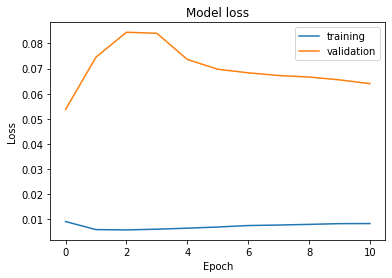

In [ ]:
plot_training_history(history)

In [ ]:
# visualization of prediction
pred_test = lstm_gru.predict(X_test)
pred_prices = prediction_to_price(pred_test, scaler)
actual_prices = prediction_to_price(y_test, scaler)

plt.plot(actual_prices, label="true")
plt.plot(pred_prices, label="predicted")
plt.legend()
plt.show()

In [ ]:
#save adn download the model
from google.colab import files
lstm_gru.save("lstm")
!zip -r /content/lstm.zip /content/lstm/
files.download("/content/lstm.zip")

## Transformer

In [ ]:
# imports
from keras.layers import Dense, LayerNormalization, MultiHeadAttention, Dropout, Conv1D, GlobalAveragePooling1D
from keras import Input, Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:
# functions

def trans_encoder(inputs, head_size, n_heads, ff_dim,
  drop=0.0):
  # MultiHeadAttention
  x = LayerNormalization(epsilon=1e-6)(inputs)
  x = MultiHeadAttention(
    key_dim=head_size, num_heads=n_heads, dropout=drop)(x, x)
  x = Dropout(drop)(x)
  res = x + inputs

  x = LayerNormalization(epsilon=1e-6)(res)
  x = Conv1D(filters=ff_dim, kernel_size=1,
    activation="relu")(x)
  x = Dropout(drop)(x)
  x = Conv1D(filters=inputs.shape[-1],
    kernel_size=1)(x)
  return x + res

def create_model(input_shape, head_size, n_heads, ff_dim,
  n_trans_blocks, mlp_units, drop=0.0, mlp_drop=0.0):

  inpts = Input(shape=input_shape)
  x = inpts
  for _ in range(n_trans_blocks):
    x = trans_encoder(x, head_size, n_heads, ff_dim, drop)

  x = GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = Dense(dim, activation="relu")(x)
    x = Dropout(mlp_drop)(x)
  oupts = Dense(1, activity_regularizer=l2(0.01))(x) 
  return Model(inpts, oupts)


In [ ]:
input_shape = X_train.shape[1:]
transformer = create_model(input_shape, head_size=256, n_heads=4,
    ff_dim=4, n_trans_blocks=4, mlp_units=[128],
    drop=0.25, mlp_drop=0.4)
transformer.compile(loss="mean_squared_error", optimizer='adam')
history = transformer.fit(X_train, y_train,validation_split=val_split, epochs=epochs, batch_size=batch_size,shuffle=False, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])  

Epoch 1/30
391/391 [==============================] - 620s 2s/step - loss: 0.0360 - val_loss: 0.1421
Epoch 2/30
391/391 [==============================] - 621s 2s/step - loss: 0.0187 - val_loss: 0.0281
Epoch 3/30
391/391 [==============================] - 626s 2s/step - loss: 0.0181 - val_loss: 0.1959
Epoch 4/30
391/391 [==============================] - 635s 2s/step - loss: 0.0368 - val_loss: 0.0748
Epoch 5/30
391/391 [==============================] - 639s 2s/step - loss: 0.0397 - val_loss: 0.1140
Epoch 6/30
391/391 [==============================] - 637s 2s/step - loss: 0.0185 - val_loss: 0.1182
Epoch 7/30
391/391 [==============================] - 638s 2s/step - loss: 0.0259 - val_loss: 0.0773
Epoch 8/30
391/391 [==============================] - 641s 2s/step - loss: 0.0389 - val_loss: 0.0764
Epoch 9/30
391/391 [==============================] - 641s 2s/step - loss: 0.0261 - val_loss: 0.0958
Epoch 10/30
391/391 [==============================] - 644s 2s/step - loss: 0.0231 - val_lo

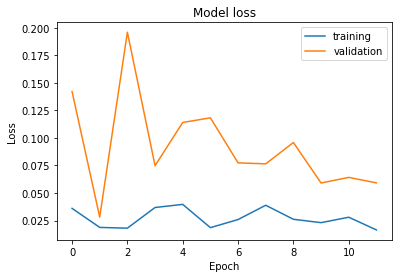

In [ ]:
# Plot training
plot_training_history(history)

In [ ]:
#save adn download the model
from google.colab import files
transformer.save("transformer")
!zip -r /content/transformer.zip /content/transformer/
files.download("/content/transformer.zip")

## Models evaluation

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import math
from sklearn import feature_selection


### Download models

In [ ]:
# donwload files
!wget "https://www.dropbox.com/s/1ctayo5vyhapxxc/lstm.zip"
!wget "https://www.dropbox.com/s/rk6b8lx6uq4wsty/transformer.zip"
!wget "https://www.dropbox.com/s/6969k7jbmy8sc5j/scaler.pickle"

In [ ]:
!unzip lstm.zip
!unzip transformer.zip

In [ ]:
# check if dataframe exists, if not download it
try: lstm_gru
except NameError: lstm_gru = None

if lstm_gru is None:
      lstm_gru = tf.keras.models.load_model('lstm')

# check if dataframe exists, if not download it
try: transformer
except NameError: transformer = None

if transformer is None:
  transformer = tf.keras.models.load_model('transformer')

try: scaler
except NameError: scaler = None

if scaler is None:
  with open('scaler.pickle', 'rb') as handle:
    scaler = pickle.load(handle)

### Evaluation

In [ ]:
def plot_pred_vs_true(true_price, pred_price):
  # visualization of prediction
  fig, ax = plt.subplots(figsize=(10,7))
  plt.plot(true_price, label="true")
  plt.plot(pred_price, label="predicted")
  plt.legend()
  plt.show()
  

In [ ]:
# predicts
actual_prices = prediction_to_price(y_test.reshape(-1,1), scaler)

testPredict_lstm = lstm_gru.predict(X_test)
pred_prices_lstm = prediction_to_price(testPredict_lstm, scaler)

testPredict_trans = transformer.predict(X_test)
pred_prices_trans = prediction_to_price(testPredict_trans, scaler)

LSTM_GRU:


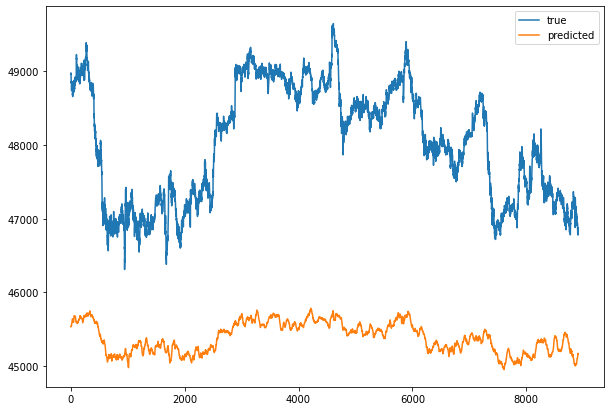

In [ ]:
print("LSTM_GRU:")
plot_pred_vs_true(actual_prices, pred_prices_lstm)

Transfrormer:


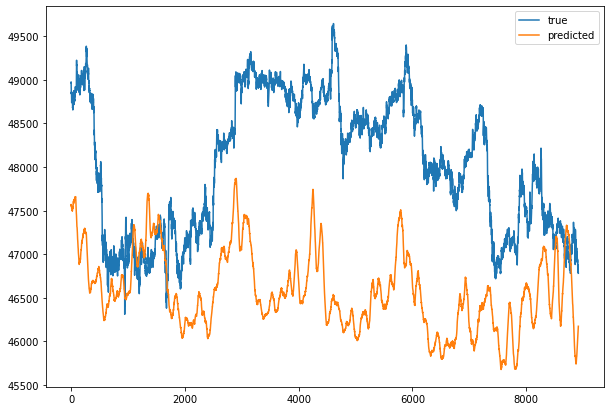

In [ ]:
print("Transfrormer:")
plot_pred_vs_true(actual_prices, pred_prices_trans)

In [ ]:
print(f"LSTM GRU RMSE: {math.sqrt(mean_squared_error(actual_prices, pred_prices_lstm))}")
print(f"Transformer RMSE: {math.sqrt(mean_squared_error(actual_prices, pred_prices_trans))}")
print("")
print(f"LSTM GRU MAE: {np.sum(np.absolute(actual_prices - pred_prices_lstm))/len(actual_prices)}")
print(f"Transformer MAE: {np.sum(np.absolute(actual_prices - pred_prices_trans))/len(actual_prices)}")

LSTM GRU RMSE: 2713.225393911248
Transformer RMSE: 1662.7520313943037

LSTM GRU MAE: 2642.9038500489355
Transformer MAE: 1481.0224068996913


In [ ]:
print("Correlation between predicted prices and features of the respective models:")
r_score_lstm = r_regression(X_test.reshape(X_test.shape[0], -1), pred_prices_lstm).reshape(X_test.shape[1], -1).mean(axis=0)
r_score_transformer = r_regression(X_test.reshape(X_test.shape[0], -1), pred_prices_trans).reshape(X_test.shape[1], -1).mean(axis=0)
f_score_lstm = f_regression(X_test.reshape(X_test.shape[0], -1), pred_prices_lstm)[0].reshape(X_test.shape[1], -1).mean(axis=0)
p_score_lstm = f_regression(X_test.reshape(X_test.shape[0], -1), pred_prices_lstm)[1].reshape(X_test.shape[1], -1).mean(axis=0)
f_score_transformer = f_regression(X_test.reshape(X_test.shape[0], -1), pred_prices_trans)[0].reshape(X_test.shape[1], -1).mean(axis=0)
p_score_transformer = f_regression(X_test.reshape(X_test.shape[0], -1), pred_prices_trans)[1].reshape(X_test.shape[1], -1).mean(axis=0)

df_r_score = pd.DataFrame([])
df_r_score["columns"] = btc_sentiment.columns[:-1]
df_r_score["lstm_score_r"] = r_score_lstm
df_r_score['lstm_score_f'] = f_score_lstm
df_r_score['lstm_score_p'] = p_score_lstm
df_r_score["trans_score_r"] = r_score_transformer
df_r_score['trans_score_f'] = f_score_transformer
df_r_score['trans_score_p'] = p_score_transformer
df_r_score.round(2)

Correlation between predicted prices and features of the respective models:


,columns,lstm_score_r,lstm_score_f,lstm_score_p,trans_score_r,trans_score_f,trans_score_p
0,open,0.89,35947.53,0.00,0.19,322.55,0.00
1,high,0.89,36087.47,0.00,0.19,326.23,0.00
2,low,0.89,35921.13,0.00,0.19,317.42,0.00
3,close,0.89,36078.55,0.00,0.19,320.80,0.00
4,Volume BTC,-0.12,128.91,0.00,-0.03,6.62,0.02
5,comments_sentiment,0.16,246.14,0.00,0.58,4455.82,0.00
6,tb_polarity,-0.28,751.36,0.00,0.16,229.80,0.00
7,tb_subjectivity,-0.18,312.53,0.00,0.27,725.68,0.00
8,anger,-0.03,9.43,0.01,0.50,3022.90,0.00
9,joy,-0.24,527.41,0.00,0.11,106.93,0.00


Correlation heatmap 

In [ ]:
import seaborn as sns
import numpy as np


In [ ]:
np.shape(X_test.reshape(-1, X_test.shape[2]))

(534960, 18)

In [ ]:
corr =  np.corrcoef(X_test.reshape(-1, X_test.shape[2]))

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

NameError: ignored

In [ ]:
x_cor = df_r_score['lstm_score']
xx_cor, yy_corr = np.meshgrid(x_cor,x_cor)

In [ ]:
X_test

array([[[0.88409268, 0.8797877 , 0.8839188 , ..., 0.59801737,
         0.86658034, 0.63837638],
        [0.88480909, 0.879803  , 0.88458818, ..., 0.59284988,
         0.87378392, 0.63099631],
        [0.88311096, 0.87810345, 0.88122841, ..., 0.58259305,
         0.86670756, 0.63468635],
        ...,
        [0.87333427, 0.8700671 , 0.87249694, ..., 0.57698697,
         0.78450535, 0.51845018],
        [0.87522125, 0.87020714, 0.87393955, ..., 0.57323449,
         0.78520893, 0.50369004],
        [0.87383736, 0.87165876, 0.87541021, ..., 0.57323449,
         0.78520893, 0.50369004]],

       [[0.88480909, 0.879803  , 0.88458818, ..., 0.59284988,
         0.87378392, 0.63099631],
        [0.88311096, 0.87810345, 0.88122841, ..., 0.58259305,
         0.86670756, 0.63468635],
        [0.87896693, 0.87395595, 0.8793628 , ..., 0.58299256,
         0.8654674 , 0.64206642],
        ...,
        [0.87522125, 0.87020714, 0.87393955, ..., 0.57323449,
         0.78520893, 0.50369004],
        [0.8

In [ ]:
corr = np.corrcoef(X_test)

ValueError: ignored

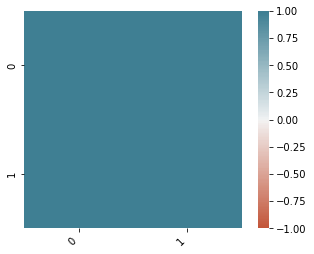

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);